# Rain prediction

## Metadata

- Date: The date of observation 
- Location: The common name of the location of the weather station
- MinTemp: The minimum temperature in degrees celsius
- MaxTemp: The maximum temperature in degrees celsius
- Rainfall: The amount of rainfall recorded for the day in mm
- Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine: The number of hours of bright sunshine in the day.
- WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am: Direction of the wind at 9am
- WindDir3pm: Direction of the wind at 3pm
- WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am: Humidity (percent) at 9am
- Humidity3pm: Humidity (percent) at 3pm
- Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many 
- Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am: Temperature (degrees C) at 9am
- Temp3pm: Temperature (degrees C) at 3pm
- RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow: This column is Yes if the rain for that day was 1mm or more.

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## DATA COLLECTION

In [43]:
rain_data = pd.read_csv('rain_data.csv')

## QUICK LOOK AT DATA STRUCTURE

In [44]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)
    

In [45]:
data_explore(rain_data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (67021, 23)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67021 entries, 0 to 67020
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           67021 non-null  object 
 1   Location       67021 non-null  object 
 2   MinTemp        65864 non-null  float64
 3   MaxTemp        65940 non-null  float64
 4   Rainfall       64271 non-null  float64
 5   Evaporation    37591 non-null  float64
 6   Sunshine       34831 non-null  float64
 7   WindGustDir    61534 non-null  object 
 8   WindGustSpeed  61576 non-null  float64
 9   WindDir9am     62270 non-null  object 
 10  WindDir3pm     64733 non-null  object 
 11  WindSpeed9am   65971 non-null  float64
 12  WindSpeed3pm   65328 non-null  float64
 13  Humidity9am    65257 non-null  floa

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

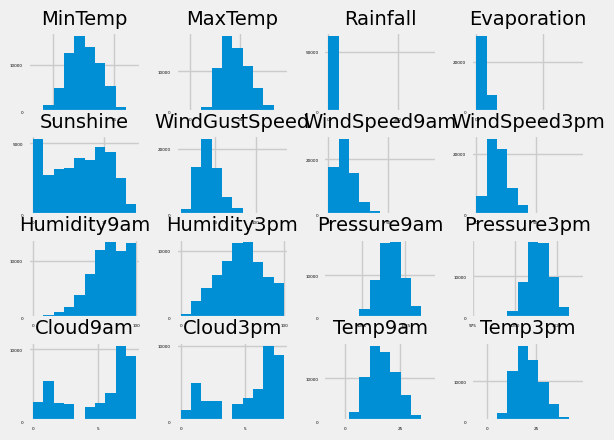

In [46]:
plt.rc('font', size=20)
plt.rc('axes', labelsize=10, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

rain_data.hist(xlabelsize=3, ylabelsize=3)

### Erase instances where we dont have the target

In [47]:
rain_data_new = rain_data.dropna(subset = ["RainTomorrow"])

In [48]:
rain_data_new["RainTomorrow"].isnull().sum()

0

In [49]:
rain_data = rain_data_new.copy()

Observations:

- Missings: 4 features with more than 37% Missings.

- Categorical variables: Turn Date into months\/seasons, cities intro countries\/ranking of raining countries..

- Numerical: Clouds multimodal, log/outliers to rainfall evaporation 

- Outliers: Rainfall, evaporation!!

- Encoding good!

- Balanced target!

## CREATE TEST SET

In [50]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    rain_data, test_size=0.2, stratify=rain_data["RainTomorrow"], random_state=42)

In [75]:
df = strat_train_set.copy()

## EXPLORATORY DATA ANALYSIS(EDA)

In [76]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (51003, 23)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 51003 entries, 66813 to 14746
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           51003 non-null  object 
 1   Location       51003 non-null  object 
 2   MinTemp        50749 non-null  float64
 3   MaxTemp        50890 non-null  float64
 4   Rainfall       50290 non-null  float64
 5   Evaporation    28965 non-null  float64
 6   Sunshine       26816 non-null  float64
 7   WindGustDir    47393 non-null  object 
 8   WindGustSpeed  47426 non-null  float64
 9   WindDir9am     47648 non-null  object 
 10  WindDir3pm     49512 non-null  object 
 11  WindSpeed9am   50491 non-null  float64
 12  WindSpeed3pm   49979 non-null  float64
 13  Humidity9am    50286 non-null  float

In [77]:
cat_cols=[i for i in df.columns if df.dtypes[i]=='object']
num_cols = [i for i in df.columns if df.dtypes[i]!='object']
target = "RainTomorrow"

Let's recode RainTomorrow and RainToday to help the analysis

In [78]:
mapping = {'Yes': 1, 'No': 0}
df['RainToday'] = df['RainToday'].map(mapping)
df['RainTomorrow'] = df['RainTomorrow'].map(mapping)


### Target EDA

In [79]:
def plot_target(df: pd.DataFrame, col: str, title: str, pie_colors:list) -> None:
    fig, ax = plt.subplots(1,2,figsize=(15, 6), width_ratios=[2,1])

    textprops={'fontsize': 12, 'weight': 'bold',"color": "black"}
    ax[0].pie(df[col].value_counts().to_list(),
            colors=pie_colors,
            labels=df[col].value_counts().index.to_list(),
            autopct='%1.f%%', 
            explode=([.05]*df[col].nunique()),
            pctdistance=0.5,
            wedgeprops={'linewidth' : 1, 'edgecolor' : 'black'}, 
            textprops=textprops)

    sns.countplot(x = col, data=df, palette = "pastel6", order=df[col].value_counts().to_dict().keys())
    for p, count in enumerate(df[col].value_counts().to_dict().values(),0):
        ax[1].text(p-0.1, count+(np.sqrt(count)), count, color='black', fontsize=13)
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    plt.yticks([])
    plt.box(False)
    fig.suptitle(x=0.56, t=f'► {title} Distribution ◄', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

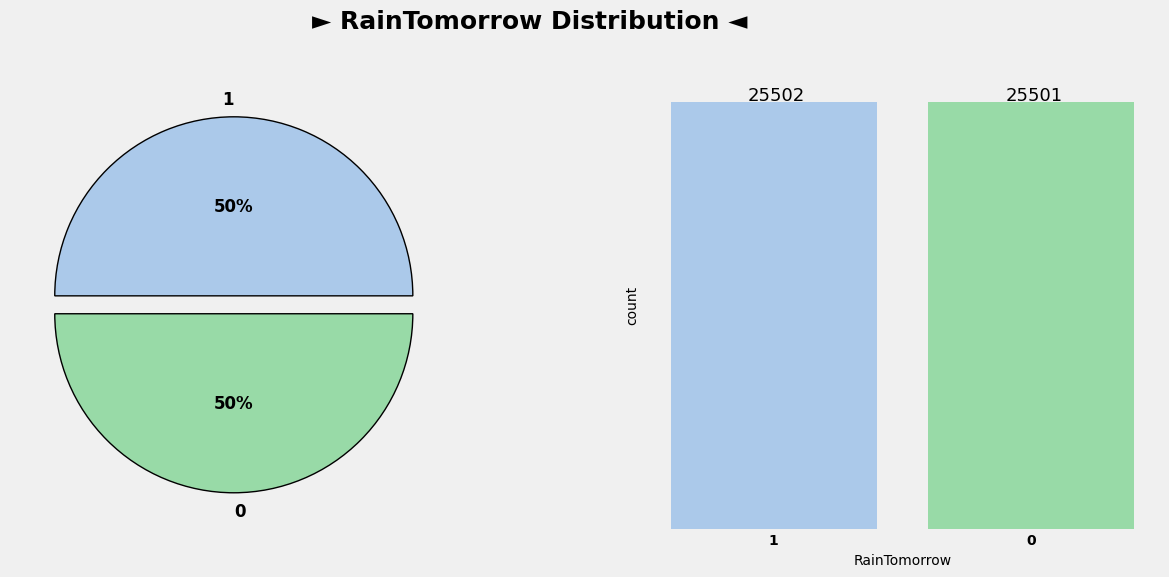

In [80]:
plot_target(df, 
            col=target, 
            title=target, 
            pie_colors=["#abc9ea","#98daa7","#f3aba8","#d3c3f7","#f3f3af","#c0ebe9"])

Fully balanced target class

## Categorical features

### Date

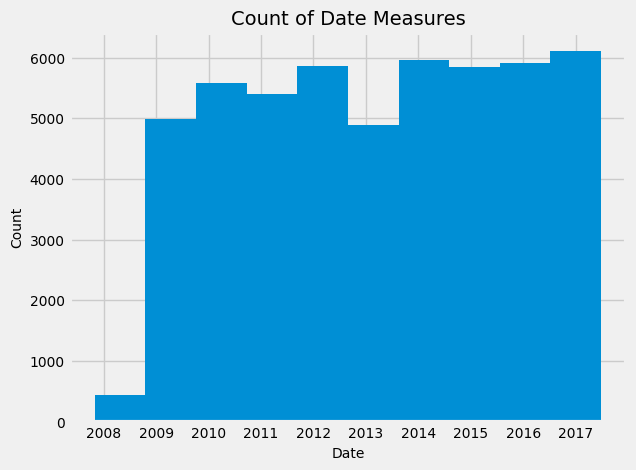

In [90]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"].hist()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Date Measures')
plt.show()

**We can see how we got data from 2008 to 2017. Where 2008 is the least measured year**

In [84]:
mean_rain = df.groupby(df['Date'].dt.date)['RainTomorrow'].mean()

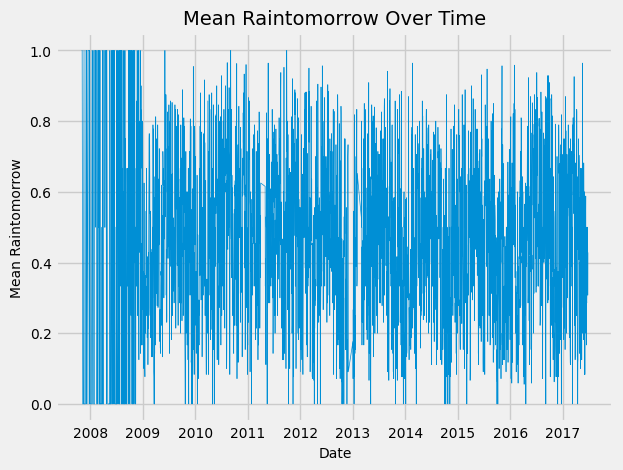

In [89]:
sns.lineplot(x=mean_rain.index, y=mean_rain.values,linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Mean Raintomorrow')
plt.title('Mean Raintomorrow Over Time')
plt.show()

We cannot see much of a trend in the mean of RainTomorrow variable, in 2008 we can see extreme values as we have few records. We can slightly see some seasonality

### Location


In [82]:
pd.crosstab(df.RainTomorrow,df.Location,margins=True).style.background_gradient(cmap='summer_r')

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,All
RainTomorrow,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,560,495,548,637,553,504,582,549,430,621,608,483,483,539,513,560,304,523,427,579,570,615,491,438,528,313,504,495,563,554,526,597,576,457,556,535,585,616,550,547,530,325,553,407,521,405,523,506,617,25501
1,555,751,503,197,470,618,450,563,738,515,309,689,746,664,635,598,214,560,515,519,262,311,727,644,575,194,646,726,473,407,467,500,453,880,461,524,371,702,625,415,458,95,424,771,579,568,720,556,159,25502
All,1115,1246,1051,834,1023,1122,1032,1112,1168,1136,917,1172,1229,1203,1148,1158,518,1083,942,1098,832,926,1218,1082,1103,507,1150,1221,1036,961,993,1097,1029,1337,1017,1059,956,1318,1175,962,988,420,977,1178,1100,973,1243,1062,776,51003


**We can see how countries are a good indicator of rain, as we can see most of them have significant differences on RainTomorrow target value**


### Rain today

In [83]:
pd.crosstab(df.RainToday,df.RainTomorrow,margins=True).style.background_gradient(cmap='summer_r')

RainTomorrow,0,1,All
RainToday,,,
0.000000,21410,13261,34671
1.000000,3920,11699,15619
All,25330,24960,50290


At first sight we can see that the fact that there's certain correlation between the fact that today hasn't rained, with the fact that tomorrow will not rain. We can see certain correlation too in the other way

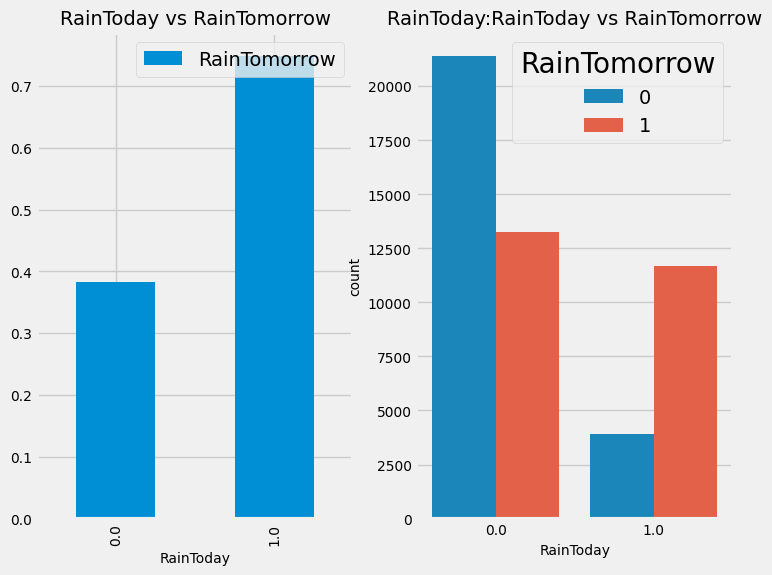

In [124]:
f,ax=plt.subplots(1,2,figsize=(8,6))
df[['RainToday','RainTomorrow']].groupby(['RainToday']).mean().plot.bar(ax=ax[0])
ax[0].set_title('RainToday vs RainTomorrow')
sns.countplot(x='RainToday',hue='RainTomorrow',data = df,ax=ax[1])
ax[1].set_title('RainToday:RainToday vs RainTomorrow')
plt.show()

We can see the difference more clear here, where the climate tends to stay the same in the following day. We will now try to see the differences that happens when we interact them with the different wind speeds

### Wind features

In [110]:
pd.crosstab(df.RainTomorrow,df.WindGustDir,margins=True).style.background_gradient(cmap='summer_r')

WindGustDir,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,All
RainTomorrow,,,,,,,,,,,,,,,,,
0,1801,1534,1354,1576,1292,1131,1041,1292,1613,1738,1690,1539,1703,1695,1312,1583,23894
1,1058,1042,939,1943,1052,1166,1483,1847,1600,1392,1413,1531,1452,2081,1809,1691,23499
All,2859,2576,2293,3519,2344,2297,2524,3139,3213,3130,3103,3070,3155,3776,3121,3274,47393


As of the isolated interactions with the Rain of tommorrow, we can see the following

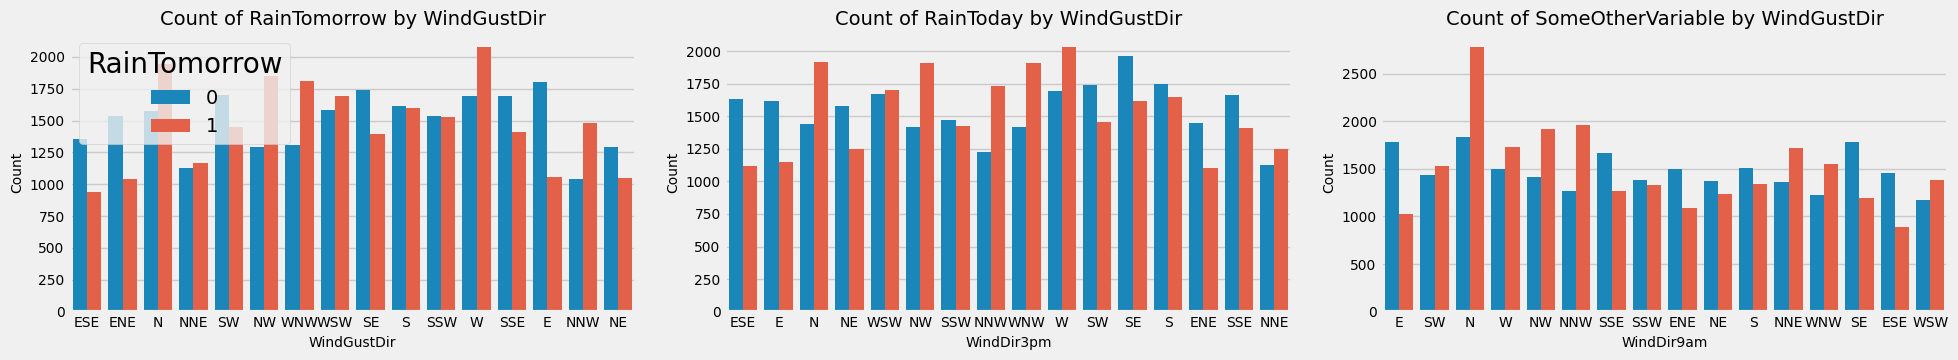

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

# Plot each seaborn plot on its own axis
sns.countplot(x='WindGustDir', hue='RainTomorrow', data=df, ax=axes[0])
axes[0].set_title('Count of RainTomorrow by WindGustDir')
axes[0].set_ylabel('Count')

sns.countplot(x='WindDir3pm',hue='RainTomorrow', data=df, ax=axes[1])
axes[1].set_title('Count of RainToday by WindGustDir')
axes[1].set_ylabel('Count')
axes[1].legend().remove()

sns.countplot(x='WindDir9am', hue='RainTomorrow', data=df, ax=axes[2])
axes[2].set_title('Count of SomeOtherVariable by WindGustDir')
axes[2].set_ylabel('Count')
axes[2].legend().remove()
# Adjust layout
plt.tight_layout()
plt.show()

In fact, seen as barplots we can see some differences between the different winds and its relation to rain. In advanced, lets try to link the clouds to the wind direction.

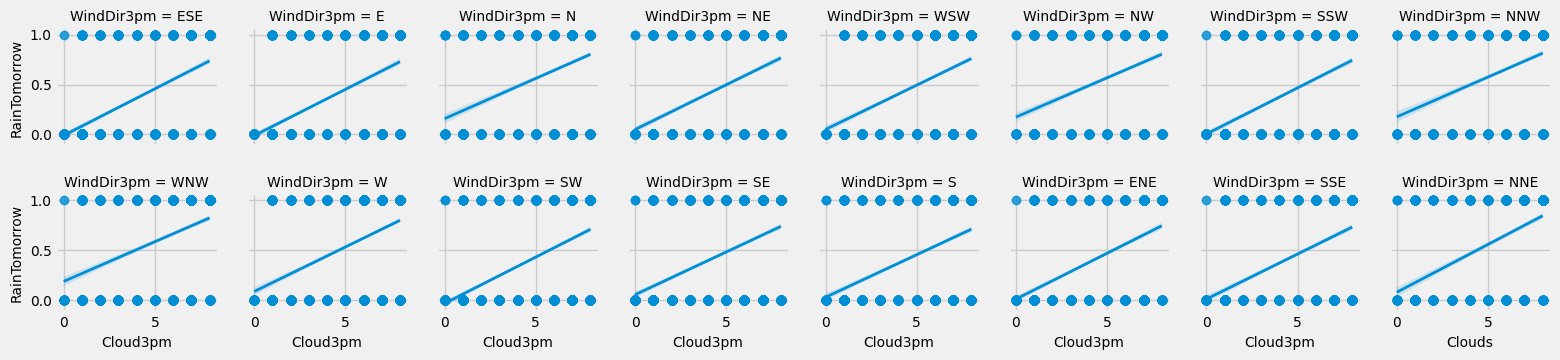

In [144]:
sns.lmplot(x='Cloud3pm', y='RainTomorrow', col='WindDir3pm', data=df,line_kws={'linewidth': 2},col_wrap=8, height=2)
plt.xlabel('Clouds')
plt.ylabel('RainTomorrow')
plt.show()

We can see how if tomorrow rained, today we likely had more clouds in 3pm. However, we cannot affirm much difference between different wind directions

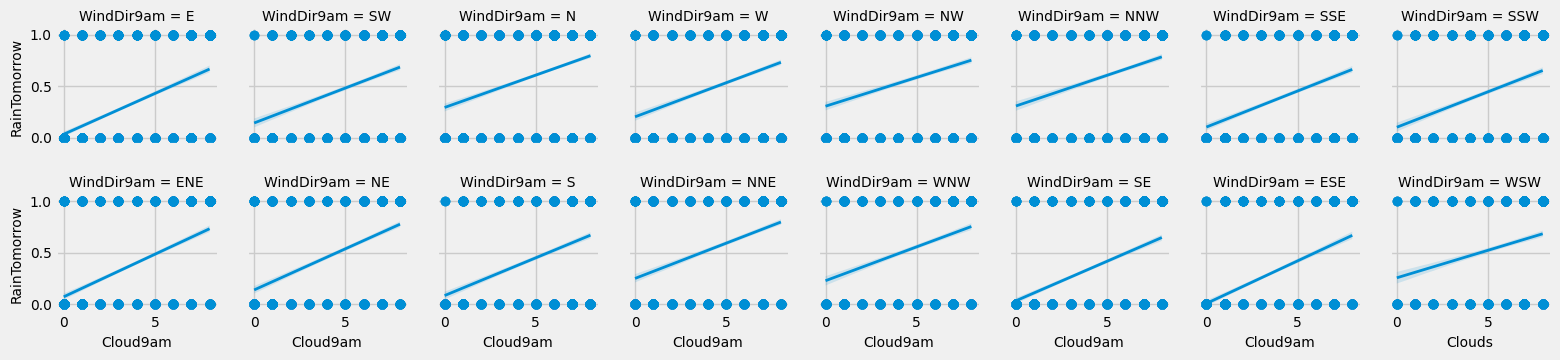

In [145]:
sns.lmplot(x='Cloud9am', y='RainTomorrow', col='WindDir9am', data=df,line_kws={'linewidth': 2},col_wrap=8, height=2)
plt.xlabel('Clouds')
plt.ylabel('RainTomorrow')
plt.show()

We can draw the same conclusions as above.

## NUMERICAL VARIABLES

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51003 entries, 66813 to 14746
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           51003 non-null  datetime64[ns]
 1   Location       51003 non-null  object        
 2   MinTemp        50749 non-null  float64       
 3   MaxTemp        50890 non-null  float64       
 4   Rainfall       50290 non-null  float64       
 5   Evaporation    28965 non-null  float64       
 6   Sunshine       26816 non-null  float64       
 7   WindGustDir    47393 non-null  object        
 8   WindGustSpeed  47426 non-null  float64       
 9   WindDir9am     47648 non-null  object        
 10  WindDir3pm     49512 non-null  object        
 11  WindSpeed9am   50491 non-null  float64       
 12  WindSpeed3pm   49979 non-null  float64       
 13  Humidity9am    50286 non-null  float64       
 14  Humidity3pm    49586 non-null  float64       
 15  Pressure9am    46086

### MinTemp, Maxtemp

<Axes: ylabel='MaxTemp'>

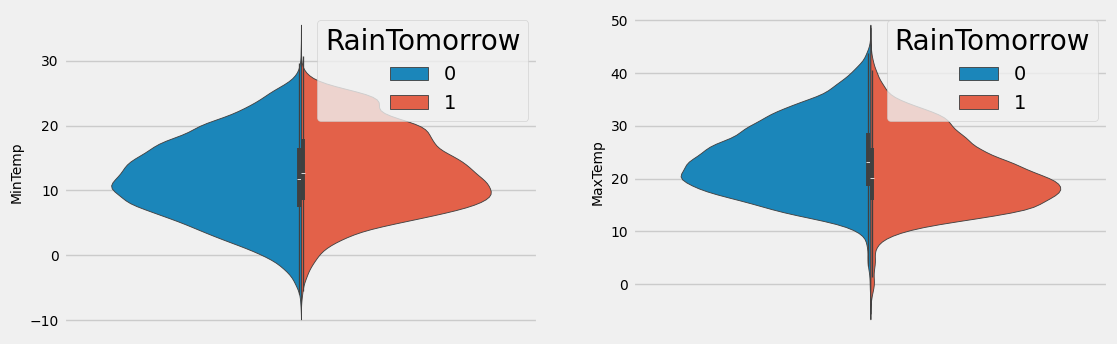

In [157]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.violinplot(y = "MinTemp",hue = 'RainTomorrow', data = df,split = True, ax = axes[0])
sns.violinplot(y = "MaxTemp",hue = 'RainTomorrow', data = df,split = True, ax = axes[1])

- MinTemp: We can see no notorious difference, however we have a slightly higher mean for a higher minimum temperature and raining tomorrow.
- MaxTemp: We can see a slightly more pronounced mean difference, where max temperatures ted to be lower when tomorrow rains


### Rainfall

For a moment we will remove the outliers that dont let us visualize the conditioned distribution at all

In [175]:
df_rain = df[df["Rainfall"] < 2].copy()


<Axes: xlabel='Rainfall', ylabel='Count'>

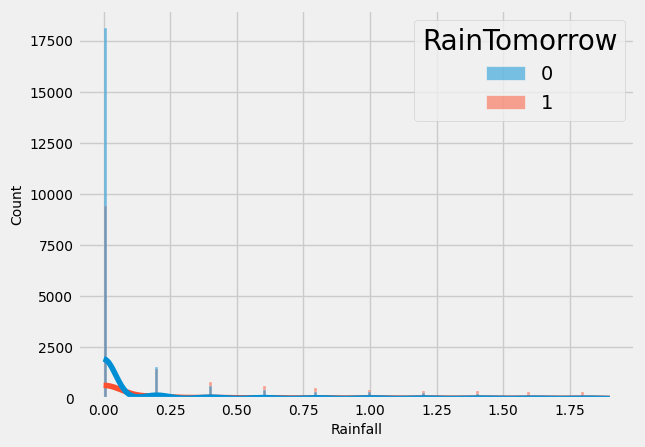

In [176]:
sns.histplot(x = 'Rainfall', hue = 'RainTomorrow', data = df_rain, kde = True)

It is a highly dispersed trough the x axis variable. However, we can see how no rain tomorrow instances have higher density at lower rainfall values

## Evaporation